In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

import os
from tensorflow.keras.models import load_model

# from sklearn.metrics import roc_auc_score, roc_curve, auc
# from sklearn.preprocessing import label_binarize

In [ ]:
train_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train'
validation_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation'
test_dir = '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test'

In [ ]:
urutan_folder = ['blackspot_bruising', 'healthy_potato', 'brown_rot', 'dry_rot', 'soft_rot']

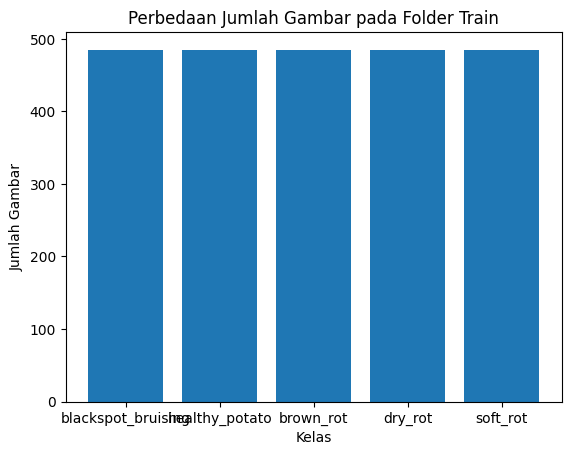

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/train/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Train')
plt.show()

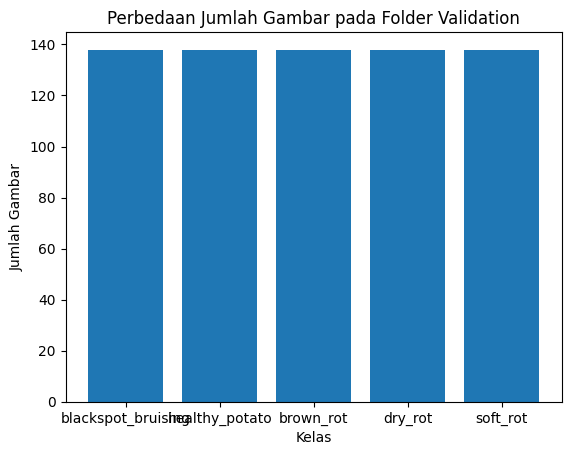

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/validation/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Validation')
plt.show()

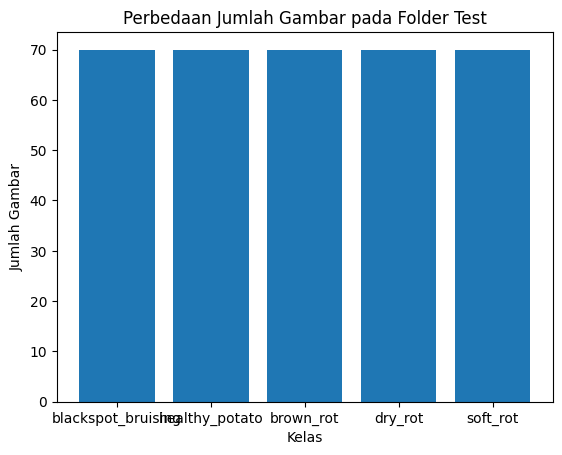

In [ ]:
folder_paths = ['/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test/blackspot_bruising',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test/healthy_potato',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test/brown_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test/dry_rot',
                '/content/drive/MyDrive/dataset_kentang/dataset_augmented_2/test/soft_rot']

# Inisialisasi list untuk menyimpan jumlah gambar di setiap folder
jumlah_gambar = []

# Loop melalui setiap folder
for folder_path in folder_paths:
    # Hitung jumlah file gambar dalam folder
    jumlah_file = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg'))])

    # Tambahkan jumlah file ke list
    jumlah_gambar.append(jumlah_file)

# Buat diagram batang
plt.bar(urutan_folder, jumlah_gambar)
plt.xlabel('Kelas')
plt.ylabel('Jumlah Gambar')
plt.title('Perbedaan Jumlah Gambar pada Folder Test')
plt.show()

In [ ]:
preprocessing_dataset = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = preprocessing_dataset.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 2425 images belonging to 5 classes.


In [ ]:
validation_generator = preprocessing_dataset.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

Found 690 images belonging to 5 classes.


In [ ]:
test_generator = preprocessing_dataset.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 350 images belonging to 5 classes.


In [ ]:
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    pooling=max,
    input_shape=(224, 224, 3)
    )

for layer in base_model.layers:
    layer.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 66489413 (253.64 MB)
Trainable params: 64231429 (245.02 MB)
Non-trainable params: 2257984 (8.61 MB)
________

In [ ]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
38/38 [==============================] - 1164s 31s/step - loss: 12.3393 - accuracy: 0.7093 - val_loss: 3.2070 - val_accuracy: 0.8333
Epoch 2/10
38/38 [==============================] - 17s 461ms/step - loss: 0.9418 - accuracy: 0.9229 - val_loss: 0.6766 - val_accuracy: 0.9159
Epoch 3/10
38/38 [==============================] - 18s 474ms/step - loss: 0.1761 - accuracy: 0.9637 - val_loss: 0.4902 - val_accuracy: 0.9261
Epoch 4/10
38/38 [==============================] - 17s 460ms/step - loss: 0.0932 - accuracy: 0.9790 - val_loss: 0.4417 - val_accuracy: 0.9275
Epoch 5/10
38/38 [==============================] - 18s 485ms/step - loss: 0.0602 - accuracy: 0.9839 - val_loss: 0.4336 - val_accuracy: 0.9377
Epoch 6/10
38/38 [==============================] - 17s 459ms/step - loss: 0.0492 - accuracy: 0.9876 - val_loss: 0.4072 - val_accuracy: 0.9290
Epoch 7/10
38/38 [==============================] - 19s 495ms/step - loss: 0.0559 - accuracy: 0.9880 - val_loss: 0.3571 - val_accuracy: 0.936

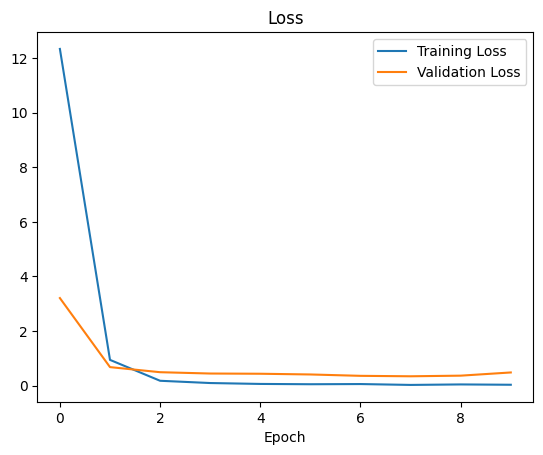

In [ ]:
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

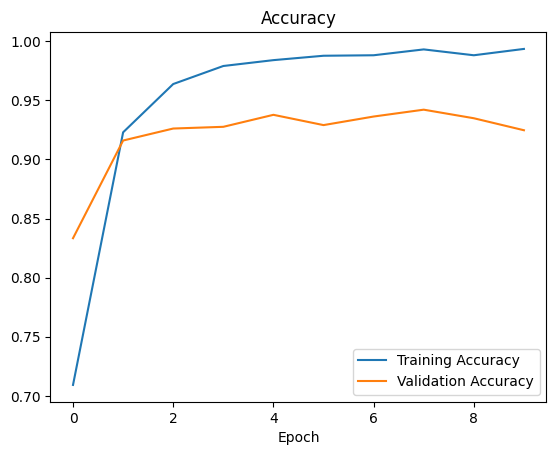

In [ ]:
plt.subplot(1, 1, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [ ]:
save_directory = '/content/drive/MyDrive/dataset_kentang/model_mobilenetv2/'
model.save(save_directory + 'mobilenetv2_dataset_augmented_2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
new_model = load_model('/content/drive/MyDrive/dataset_kentang/model_mobilenetv2/mobilenetv2_dataset_augmented_2.h5')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 flatten (Flatten)           (None, 62720)             0         
                                                                 
 dense (Dense)               (None, 1024)              64226304  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 5)                 5125      
                                                                 
Total params: 66489413 (253.64 MB)
Trainable params: 64231429 (245.02 MB)
Non-trainable params: 2257984 (8.61 MB)
________

In [ ]:
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_labels = test_generator.classes
urutan_folder = ['blackspot_bruising', 'healthy_potato', 'brown_rot', 'dry_rot', 'soft_rot']

6/6 [==============================] - 132s 26s/step


In [ ]:
class_report = classification_report(true_labels, predicted_classes, target_names=urutan_folder)
print("Classification Report:\n", class_report)

Classification Report:
                     precision    recall  f1-score   support

blackspot_bruising       0.96      0.91      0.93        70
    healthy_potato       0.99      1.00      0.99        70
         brown_rot       0.90      0.94      0.92        70
           dry_rot       1.00      1.00      1.00        70
          soft_rot       0.96      0.94      0.95        70

          accuracy                           0.96       350
         macro avg       0.96      0.96      0.96       350
      weighted avg       0.96      0.96      0.96       350

